In [32]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, neighbors, svm, metrics
from sklearn.model_selection import train_test_split
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

#loading the dataset and getting the features and training data
dataset = datasets.load_iris()
X = dataset.data / dataset.data.max()
y = dataset.target
labels = dataset.target_names

#print the atual data's shape
print(X.shape, y.shape, labels)

#spliting the data in train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.4)
print("X train, X test", X_train.shape, X_test.shape)
print("Y train, Y test", y_train.shape, y_test.shape)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


(150, 4) (150,) ['setosa' 'versicolor' 'virginica']
X train, X test (90, 4) (60, 4)
Y train, Y test (90,) (60,)


In [38]:
print("\n--------- LOGISTIC REGRESSION -------------\n")
lr = LogisticRegression(solver='lbfgs',multi_class='multinomial', C=10).fit(X_train, y_train)
print(lr.get_params())
y_pred = lr.predict(X_test)
print("Score:",lr.score(X_train, y_train))

cm = metrics.confusion_matrix(y_test, y_pred)
print("Precision/Recall:\n%s" % metrics.classification_report(y_test, y_pred, target_names=labels))
print("Confusion matrix:\n%s" % cm)




--------- LOGISTIC REGRESSION -------------

{'C': 10, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': 1, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Score: 0.9555555555555556
Precision/Recall:
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       0.88      1.00      0.94        23
  virginica       1.00      0.86      0.92        21

avg / total       0.96      0.95      0.95        60

Confusion matrix:
[[16  0  0]
 [ 0 23  0]
 [ 0  3 18]]


Confusion matrix, without normalization
[[16  0  0]
 [ 0 23  0]
 [ 0  3 18]]


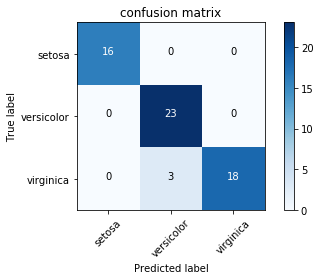

In [39]:
plot_confusion_matrix(cm, classes=labels, normalize=False, title='confusion matrix' )


Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.14285714 0.85714286]]


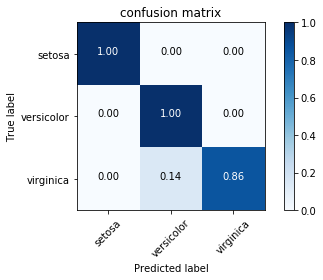

In [40]:
plot_confusion_matrix(cm, classes=labels, normalize=True, title='confusion matrix' )
#--- SVM -----------
#clf = svm.SVC(gamma='auto')
#print(clf.fit(X_digits,y_digits)

# ----- Statsmodels ----------
#X = sm.add_constant(X_digits)
#model = sm.OLS(y_digits, X).fit()
#print(model.summary())
